In [83]:
import pandas as pd
import numpy as np
from pandas import HDFStore,read_hdf

In [84]:
df_final_train=read_hdf('/Users/saisantosh/Desktop/Facebook/Storage_sample_stage.h5','final_train',mode='r')
df_final_test=read_hdf("/Users/saisantosh/Desktop/Facebook/Storage_sample_stage.h5",'final_test',mode='r')

In [86]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'Jaccard_followers', 'Jaccard_followees', 'Cosine_followers',
       'Cosine_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'P_A_followee',
       'P_A_followers', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3',
       'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1',
       'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',
       'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5',
       'svd_v_d_6'],
      dtype='object')

In [88]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'Jaccard_followers', 'Jaccard_followees', 'Cosine_followers',
       'Cosine_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'P_A_followee',
       'P_A_followers', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3',
       'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1',
       'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',
       'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5',
       'svd_v_d_6'],
      dtype='object')

In [89]:
y_train=df_final_train.indicator_link
y_test=df_final_test.indicator_link

In [91]:
#dropping source_node,destination_node, indicator_links

df_final_train.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)


Estimators =  10 Train Score 0.9188062968263321 test Score 0.9114352861468102
Estimators =  50 Train Score 0.9249151792299749 test Score 0.9176625137723536
Estimators =  100 Train Score 0.9250105529759391 test Score 0.9178297204428796
Estimators =  250 Train Score 0.9236672518738895 test Score 0.916058934195785
Estimators =  450 Train Score 0.9237135055660577 test Score 0.9157639108858621


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

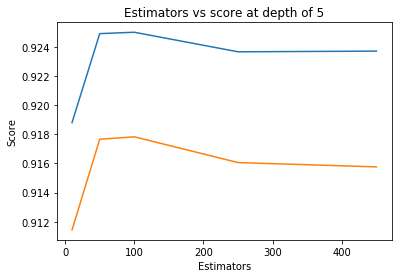

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pylab as plt


%matplotlib inline

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i,random_state=25,verbose=0,warm_start=False)
    
    
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    
    train_scores.append(train_sc)
    
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth= 3 Train score 0.916261278117334 and Test scores 0.9094447001715698
depth= 9 Train score 0.9554083703299306 and Test scores 0.9223292729510632
depth= 11 Train score 0.9592841071373531 and Test scores 0.9229887497346636
depth= 15 Train score 0.9617618935008585 and Test scores 0.9245876551606869
depth= 20 Train score 0.9631508157335441 and Test scores 0.9253712319163853
depth= 35 Train score 0.9628602819620286 and Test scores 0.9253484024473146
depth= 50 Train score 0.9628602819620286 and Test scores 0.9253484024473146
depth= 70 Train score 0.9628602819620286 and Test scores 0.9253484024473146
depth= 130 Train score 0.9628602819620286 and Test scores 0.9253484024473146


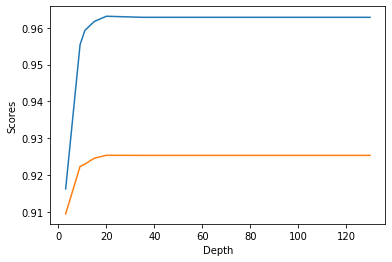

In [93]:
depths=[3,9,11,15,20,35,50,70,130]
train_scores=[]
test_scores=[]
for i in depths:
    clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    
    train_sc=f1_score(y_train,clf.predict(df_final_train))
    test_sc=f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth=',i,"Train score",train_sc, "and Test scores",test_sc)
plt.plot(depths,train_scores,label='Train score')
plt.plot(depths,test_scores,label='Test score')
plt.xlabel("Depth")
plt.ylabel("Scores")
plt.show()

In [94]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


param_dist={"n_estimators":sp_randint(105,125),
            "max_depth":sp_randint(10,15),
            "min_samples_split":sp_randint(110,190),
            "min_samples_leaf":sp_randint(25,65)}

clf=RandomForestClassifier(random_state=25)

rf_random=RandomizedSearchCV(clf,param_distributions=param_dist,n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print("mean test scores",rf_random.cv_results_["mean_test_score"])
# print("mean train score",rf_random.cv_results_["mean_train_score"])
# print('mean train scores',rf_random.cv_results_['mean_train_score'])

print("*"*20)
print(rf_random.best_estimator_)


mean test scores [0.96039905 0.96047066 0.95840575 0.96014103 0.96195597]
********************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [95]:
print("*"*80)
print(rf_random.best_estimator_)

********************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [96]:
#now with best estimator

clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

clf.fit(df_final_train,y_train)
y_train_pred=clf.predict(df_final_train)
y_test_pred=clf.predict(df_final_test)

from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))


Train f1 score 0.9629910682240019
Test f1 score 0.9248238390355717


In [97]:
from sklearn.metrics import confusion_matrix

import seaborn as sns#Plots
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    recall =(((C.T)/(C.sum(axis=1))).T)
    
    precision =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    
    # representing A in heatmap format
    
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(precision, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(recall, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Test_confusion_matrix


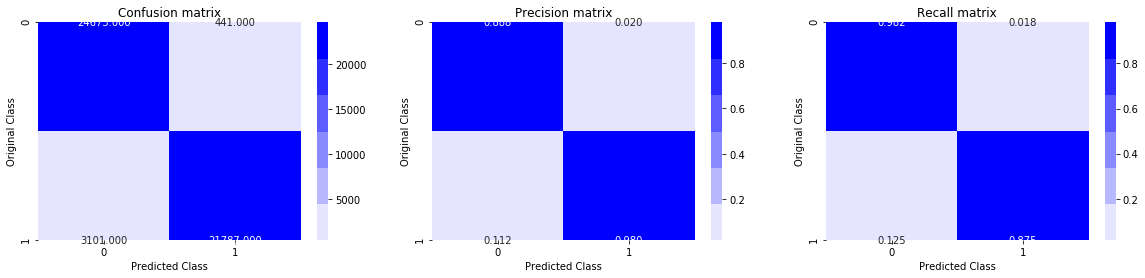

In [98]:
print("Test_confusion_matrix")
plot_confusion_matrix(y_test,y_test_pred)

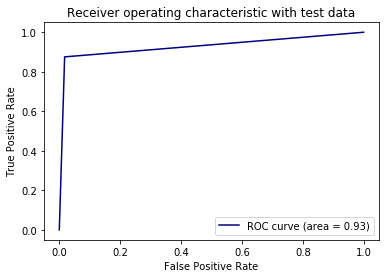

In [99]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()